In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [9]:
housing = pd.read_csv('/Users/Admin/Downloads/mlr_housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
housing.shape

(545, 13)

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


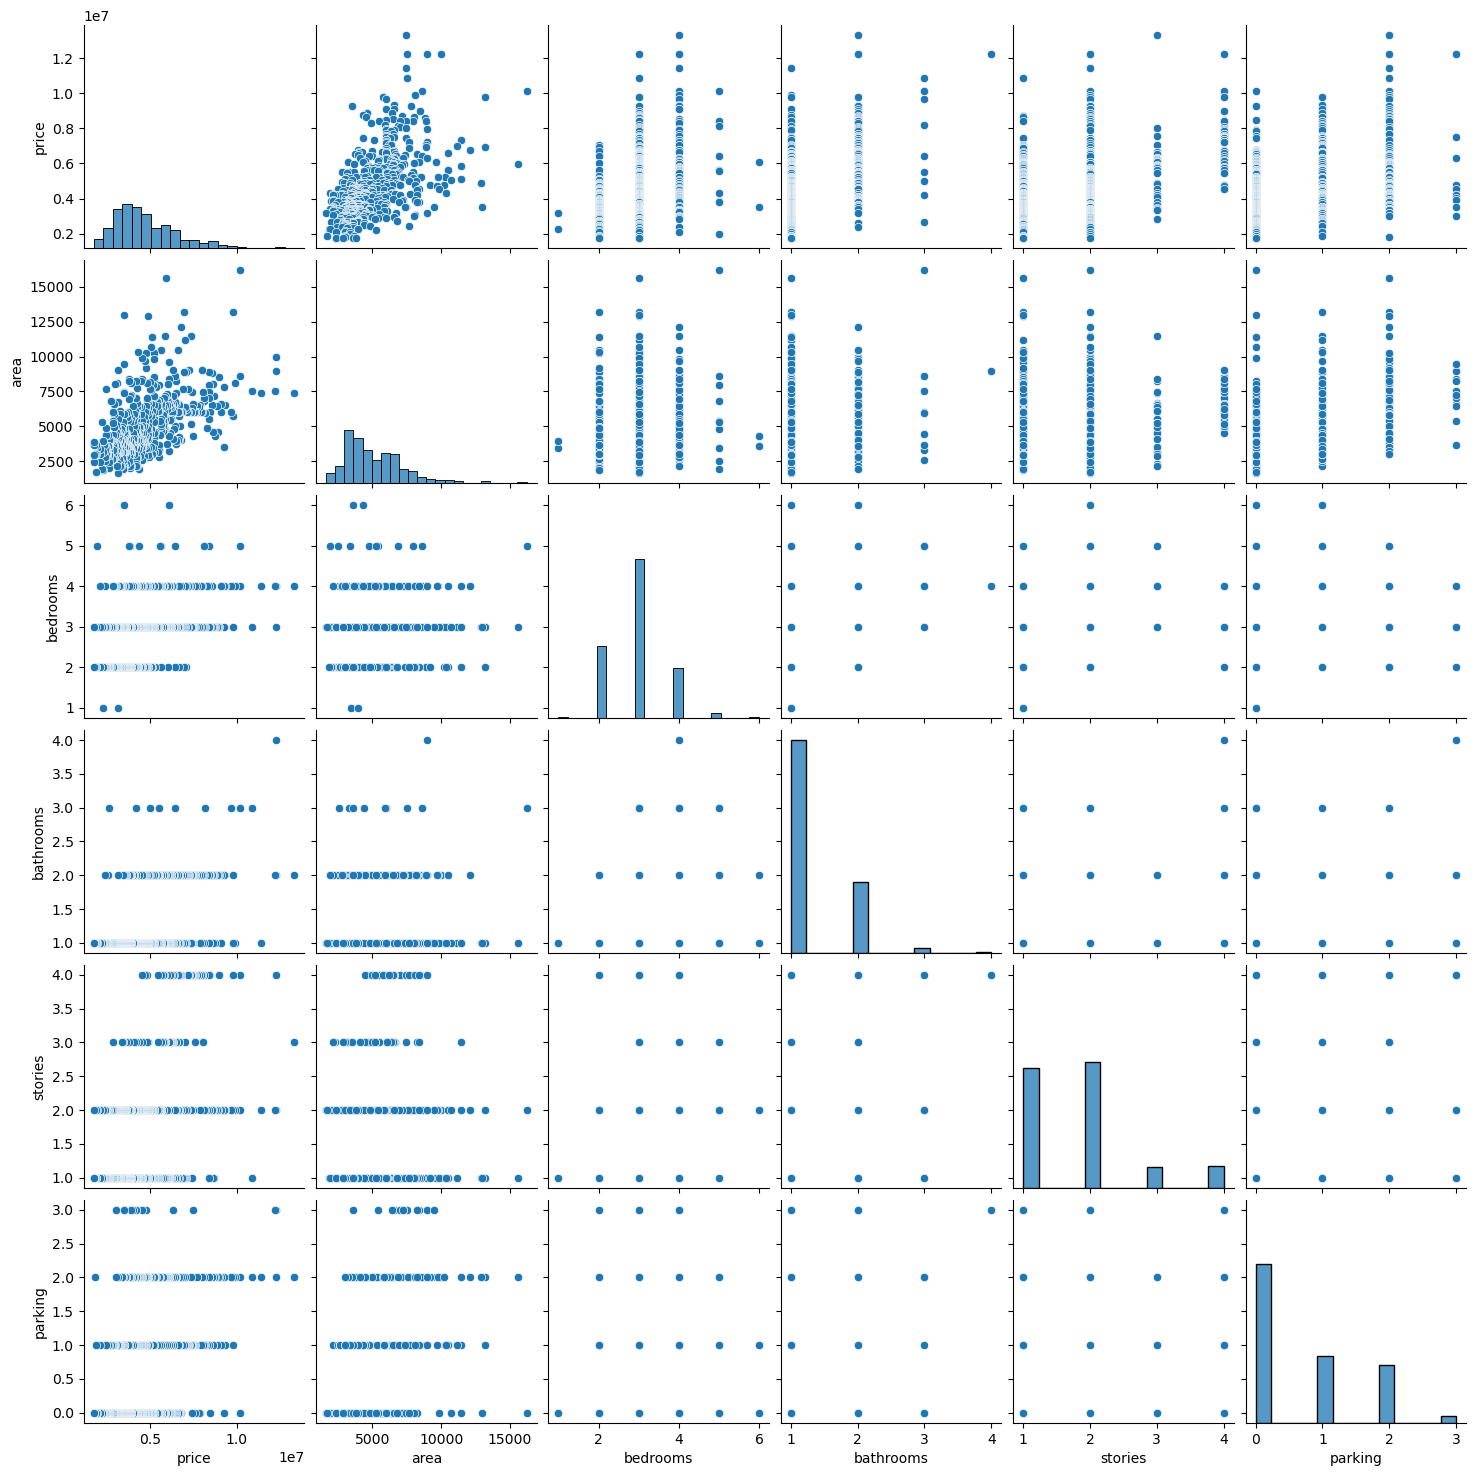

In [15]:
sns.pairplot(housing)
plt.show()

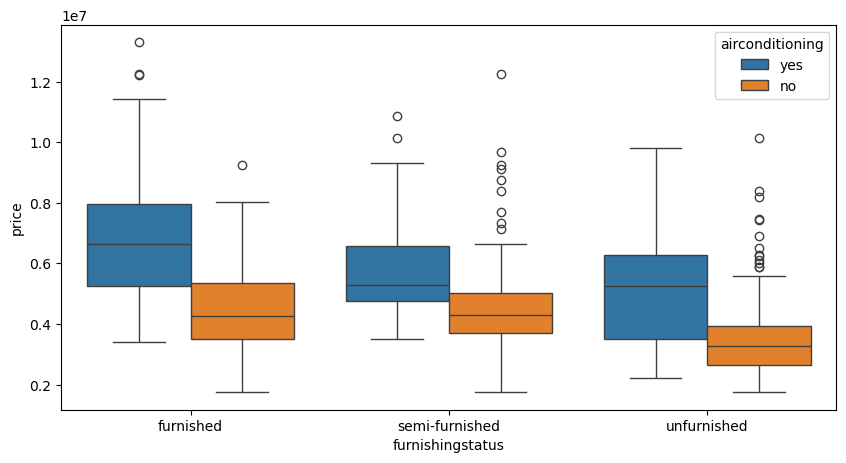

In [16]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

# List of variable to map

In [18]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binarymap(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binarymap)

In [22]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Dummy Variable

In [25]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [27]:
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [29]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [31]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [33]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


# Step 4: Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


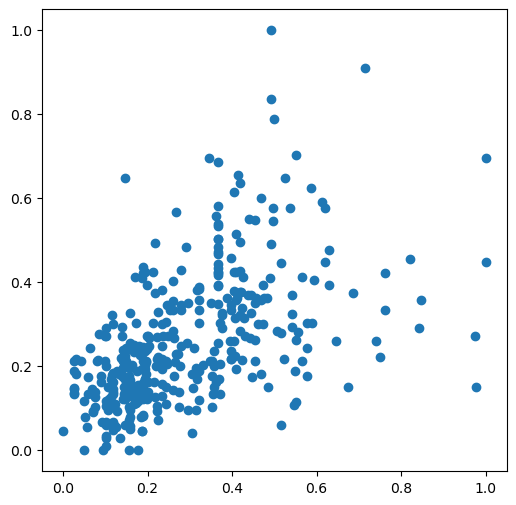

In [44]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

# Dividing into X and Y sets for the model building

In [47]:
y_train = df_train.pop('price')
X_train = df_train

# Step 5: Building a linear model

In [51]:
import statsmodels.api as sm
# Add a constant
X_train_lm = sm.add_constant(X_train[['area']])
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [53]:
# Check the parameters obtained
lr.params

const    0.126894
area     0.462192
dtype: float64

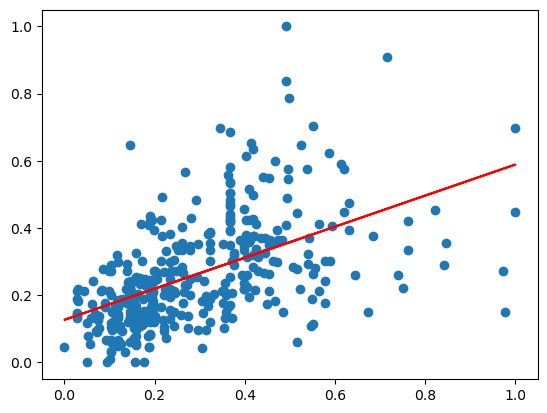

In [55]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [57]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.15e-29
Time:                        14:54:08   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [59]:
# Assign all the feature variables to X
X_train_lm = X_train[['area', 'bathrooms']]

In [61]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

# Adding all the variables to the model

In [64]:
# Check all the columns of the dataframe
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [86]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming X_train and y_train are defined

# Step 1: Ensure X_train and y_train are Pandas objects
X_train = pd.DataFrame(X_train) if not isinstance(X_train, pd.DataFrame) else X_train
y_train = pd.Series(y_train) if not isinstance(y_train, pd.Series) else y_train

# Step 2: Convert all columns in X_train to numeric, force errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Step 3: Drop rows with NaN or infinite values from X_train and y_train
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()

# Step 4: Align indices by keeping only common valid indices
common_indices = X_train.index.intersection(y_train.index)
X_train = X_train.loc[common_indices]
y_train = y_train.loc[common_indices]

# Step 5: Convert to float data types explicitly to avoid casting issues
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Step 6: Add a constant to X_train
X_train_lm = sm.add_constant(X_train)

# Step 7: Convert everything to a NumPy array for statsmodels
X_train_lm = np.asarray(X_train_lm)
y_train = np.asarray(y_train)

# Step 8: Fit the model safely
try:
    lr_1 = sm.OLS(y_train, X_train_lm).fit()
    # Output parameters
    print(lr_1.params)
except Exception as e:
    print(f"An error occurred: {e}")


[ 0.35870669 -0.02194678 -0.07236998 -0.05658268  0.04082271 -0.05294909
  0.06181232 -0.02710779  0.03287518  0.0227386  -0.04069109 -0.00683445
 -0.01006476 -0.01202848]


In [88]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.042
Date:                Fri, 18 Oct 2024   Prob (F-statistic):              0.413
Time:                        16:24:35   Log-Likelihood:                 92.122
No. Observations:                 188   AIC:                            -156.2
Df Residuals:                     174   BIC:                            -110.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3587      0.090      3.972      0.0

# Checking VIF 
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
# $VIF_{i}$ = $\frac{1}{1-R_{i}^2}$

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mainroad,14.55
1,bedrooms,11.53
0,area,6.99
3,stories,3.43
6,basement,2.71
9,parking,2.54
11,semi-furnished,2.38
8,airconditioning,2.26
2,bathrooms,1.98
10,prefarea,1.83


In [135]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('semi-furnished', axis=1)

In [137]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [139]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.124
Date:                Fri, 18 Oct 2024   Prob (F-statistic):              0.344
Time:                        17:33:14   Log-Likelihood:                 92.051
No. Observations:                 188   AIC:                            -158.1
Df Residuals:                     175   BIC:                            -116.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3452      0.082     

In [141]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,mainroad,12.94
1,bedrooms,11.32
0,area,6.77
3,stories,3.42
6,basement,2.68
9,parking,2.54
8,airconditioning,2.25
2,bathrooms,1.98
10,prefarea,1.83
5,guestroom,1.61


# Dropping the Variable and Updating the Model

In [146]:
X = X.drop('mainroad', axis=1)

In [148]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [150]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.178
Date:                Fri, 18 Oct 2024   Prob (F-statistic):              0.305
Time:                        17:41:00   Log-Likelihood:                 91.750
No. Observations:                 188   AIC:                            -159.5
Df Residuals:                     176   BIC:                            -120.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2966      0.050     

In [152]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.89
0,area,5.54
3,stories,3.29
5,basement,2.59
8,parking,2.51
7,airconditioning,2.25
2,bathrooms,1.96
9,prefarea,1.83
4,guestroom,1.61
10,unfurnished,1.29


In [154]:
X = X.drop('bedrooms', axis=1)

In [158]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [160]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.261
Date:                Fri, 18 Oct 2024   Prob (F-statistic):              0.256
Time:                        17:47:50   Log-Likelihood:                 91.544
No. Observations:                 188   AIC:                            -161.1
Df Residuals:                     177   BIC:                            -125.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2751      0.036     

In [162]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,area,4.97
2,stories,2.43
7,parking,2.37
6,airconditioning,2.25
4,basement,2.23
1,bathrooms,1.85
8,prefarea,1.82
3,guestroom,1.61
9,unfurnished,1.29
5,hotwaterheating,1.20


# Step 7: Residual Analysis of the train data

In [165]:
y_train_price = lr_4.predict(X_train_lm)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19908\1839134732.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


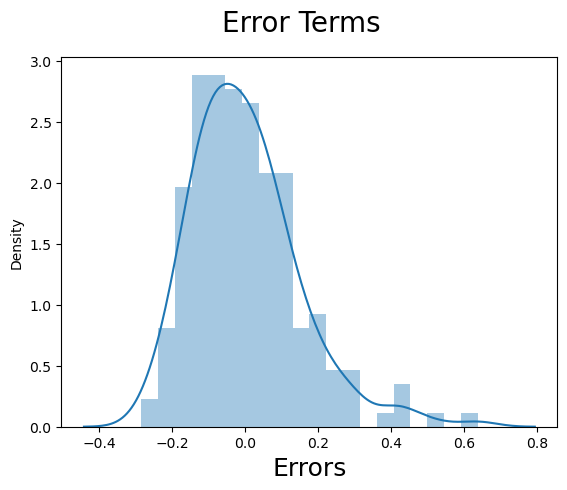

In [173]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)             #Plot heading
plt.xlabel('Errors', fontsize = 18)                    # X-Label
plt.show()

# Step 8: Making Predictions Using the final Model
Applying the scaling on the test sets

In [176]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [178]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
y_test = df_test.pop('price')
X_test = df_test

In [184]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [186]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [188]:
X_test_m4.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0.000000,1,False
54,1.0,0.366420,0.5,0.333333,1,1,0,1,0.333333,0,False
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0.333333,1,False
244,1.0,0.306582,0.0,0.333333,1,1,0,0,0.000000,1,False
268,1.0,0.274023,0.0,0.333333,1,0,0,1,0.000000,0,False


In [190]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

# Step 9: Model Evaluation

In [193]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred_m4)

-0.1801226607533517

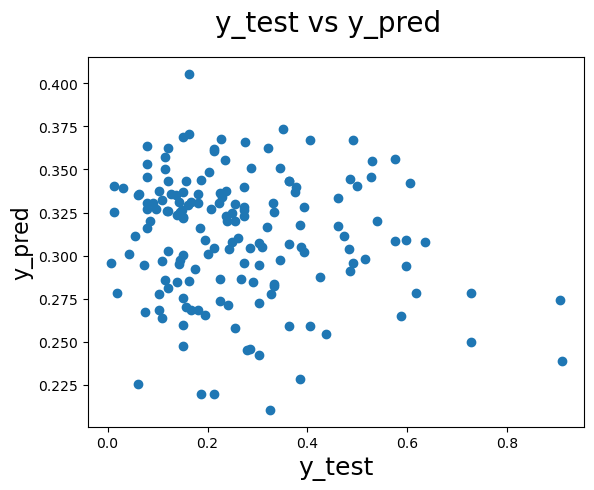

In [195]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()